# Opal Loss example

<a target="_blank" href="https://colab.research.google.com/github/pcr-upm/opal23_headpose/blob/main/notebooks/opal_loss.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook shows an usage example of our Opal Loss function for Head Pose Estimation.

### Preliminaries

In [1]:
!wget -nc https://raw.githubusercontent.com/pcr-upm/opal23_headpose/main/src/opal.py

File ‘opal.py’ already there; not retrieving.



In [2]:
import matplotlib.pyplot as plt
import torch
from opal import OpalLoss

In [3]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Instantiate Opal Loss with the required parameters
**epsilon**: the threshold value to separate the L2 and tanh parts.

**beta**: the threshold value to separate the tanh and L1 parts.

**sigma**: value to multiply the tanh loss. It amplifies the gradients generated by this part.

**mu**: the gradients from the tanh loss resemble a pseudo-gaussian distribution. This parameter specifies the 'mean' of this gaussian distribution. Thus, it is recommended to give it a value such that epsilon < mu < beta.

You can try to play with the parameters to see how they affect the loss and gradients in the plot below.

Also, since this is a generalization of the Geodesic loss you can mimic this loss function by putting all parameters to 0.

In [4]:
EPSILON = 5
BETA = 15
SIGMA = 12
MU = 10
opal = OpalLoss(EPSILON, BETA, SIGMA, MU, degrees=True, euler=True, reduction='none')

### Generate ground-truth and predicted Euler angles
Opal loss accepts both Euler angles (degrees) and rotation matrices as input. Just change the ```euler``` parameter accordingly.

In [5]:
# Generate ground-truth and predicted Euler angles in degrees
NUM_SAMPLES = 100
RANGE = (-25, 25)

gt = torch.zeros((NUM_SAMPLES, 3), dtype=torch.float32).to(DEVICE)
pred = gt.clone()
pred[:, 0] = torch.linspace(RANGE[0], RANGE[1], NUM_SAMPLES)
pred.requires_grad = True

### Compute Opal loss and gradients
Here, we compute and plot the loss function and its gradients.

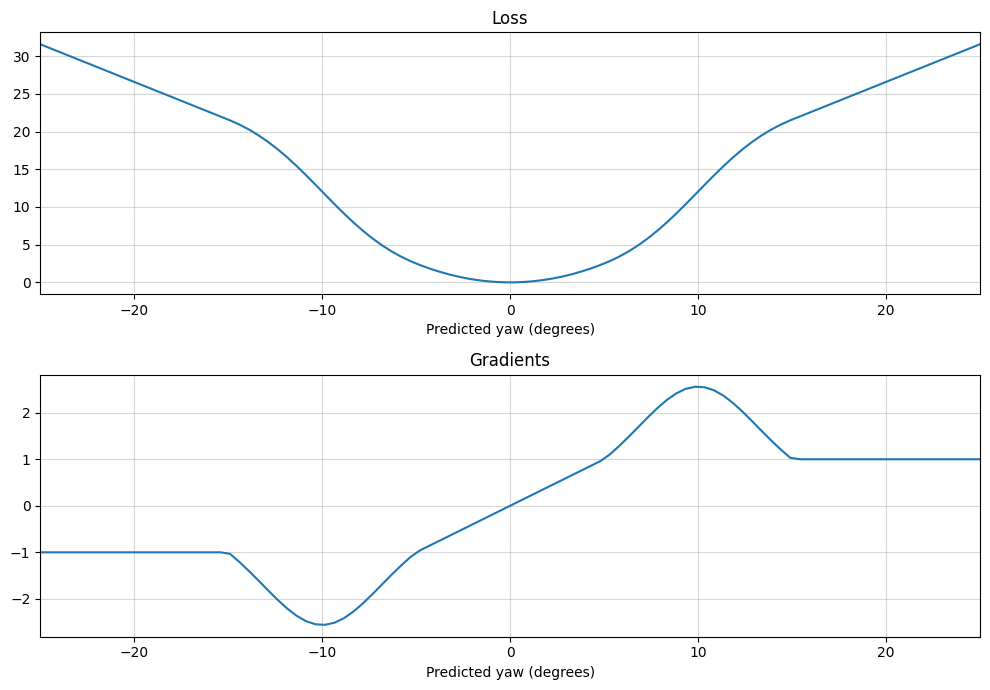

In [6]:
loss = opal(pred, gt)
loss.sum().backward()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
x = pred[:, 0].detach().cpu().numpy()
loss = loss.detach().cpu().numpy()
grad = pred.grad[:, 0].detach().cpu().numpy()

axes[0].plot(x, loss)
axes[0].set_title('Loss')

axes[1].plot(x, grad)
axes[1].set_title('Gradients')
    
for ax in axes:
    ax.set_xlim(RANGE[0], RANGE[1])
    ax.set_xlabel('Predicted yaw (degrees)')
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.show()